___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="300" height="500" />
    
    
### <font color='navy'> Modelado de pronóstico de series de tiempo.

**Nombres:** Andre Yahir Gonzalez Cuevas Sergio Daniel Dueñas Godinez

**Fecha:** 07 de Mayo del 2024.

**Expediente** : 739922, 739300
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Andr3Glez/proyecto_modulo1

# Proyecto Final

> De la base seleccionada debe de poder aplicarse cada uno de las tres secciones del curso.
> 1. Predicción de series de tiempo lineal (SARIMAX).  
> 2. Predicción de series de tiempo no lineal (MLP, CNN, LSTM, etc).
> 3. Clasificación de series de tiempo. Si la base de datos no tiene información suficiente para poder realizar clasificación, se puede utilizar otra base de datos diferente para aplicar las técnicas vistas para clasificar series de tiempo

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Título del trabajo.
> Debe describir el trabajo.

### 1.2 Objetivos.
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser **concretos, evaluables y verificables.**
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 1.3 Definición del problema.
> Se debe describir en una cuartilla máximo cuál es el escenario de negocio que se va a modelar, identificar cuáles son los supuestos que defines en el negocio y cuáles son los "nodos" o "escenarios" que identificas necesarios simular y porqué. Debes elaborar un diagrama de inicio a fin, identificando los "nodos" o "escenarios" a simular.

### 1.4 Nodos y variables que se decidieron simular y porqué
> En este apartado el objetivo es identificar los problemas que se van a abordar, para examinar la factibilidad y viabilidad de la simulación de los nodos escogidos. Posteriormente se debe de argumentar del porqué de los nodos escogidos.

### 1.5 Obtención de bases de datos
> El tercer paso del proyecto es indicar de dónde se obtendrán las bases de datos, que indican como se han comportado las variables que identificaste en tu proceso de negocio que vas a simular. En esta investigación debes haber encontrado información propia de la empresa, organización o institución que vas a simular y otra parte de la información debe provenir de investigación que realices en fuentes de información públicas o privadas como las que tiene SECOBI, ahí normalmente y dependiendo del problema elegido, se investigan variables económicas, como tasas de interés, inflación, tipo de cambio, etc., de varios años, por poner un ejemplo.

### 1.6 Visualización de resultados de simulación.
> Para cada uno de los temas del curso, realizar la estimación y predicción de errores de los algoritmos propuestos. Al final luego de obtener los resultados de cada tema realizar una comparación de los resultados lineales y no lineales y concluir los distintos resultados.

### 1.7 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.8 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

> - Bitcoin historical data. (2021, 11 abril). Kaggle. https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data
> - Zielak (2021, April). Bitcoin Historical Data. Retrived April 03, 2024 from https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data
> - Prabhakaran, S. (2023, 27 febrero). Interpolation in Python – How to interpolate missing data, formula and approaches. Machine Learning Plus. https://www.machinelearningplus.com/machine-learning/interpolation-in-python-how-to-interpolate-missing-data-formula-approaches/

# Codigo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

import datetime
from datetime import datetime
from pandas.tseries.offsets import DateOffset
from pandas.tseries.offsets import MonthEnd

import statsmodels.api as sm
from scipy import stats
import itertools

import plotly.express as px

from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

import gc
import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")

### EDA

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelos/Proyecto/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")

In [72]:
df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")

In [73]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 279.1 MB


Las columnas de `Open` y `Close` indican el precio de apertura y cierre en un día particular.

Las columnas de `High` y `Low` proporcionan el precio más alto y más bajo en un día particular, respectivamente.

La columna de `Volume` nos informa sobre el volumen total negociado en un día particular.

La columna `Weighted_Price` es un punto de referencia de comercio utilizado por los traders que proporciona el precio ponderado al que un valor ha sido negociado a lo largo del día, basado tanto en el volumen como en el precio. Es importante porque brinda a los traders una visión tanto de la tendencia como del valor de un valor.

Cada fila presenta un intervalo de comercio de 1 minuto. Los campos NaN representan marcas de tiempo sin ningún comercio ocurriendo. La mayoría de los campos NaN están presentes muy temprano en el conjunto de datos. Los bitcoins eran en su mayoría desconocidos en este período, lo que significa que no hubo muchos intercambios.

Al observar la columna de `Timestamp`, vemos que necesitamos convertirla a formato de fecha

#### Conversion de Tiempo

In [75]:
df['Timestamp'] = df['Timestamp'].apply(datetime.fromtimestamp)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 01:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 01:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 01:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 01:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 01:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora visualizemos nuestra serie de tiempo

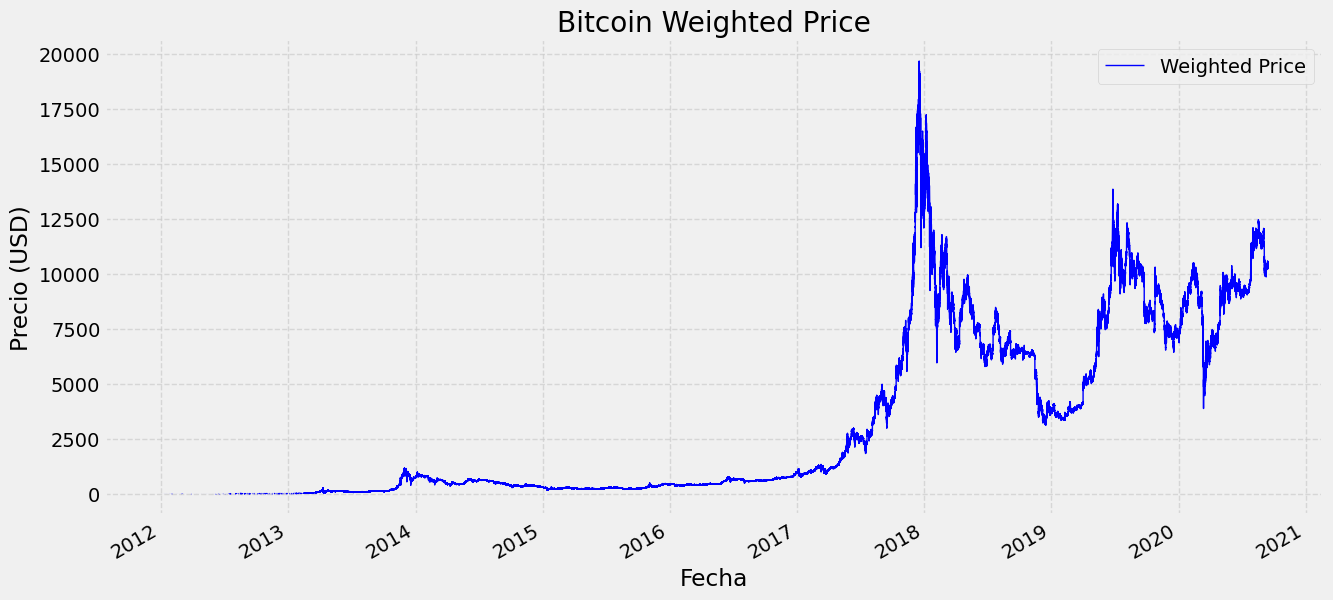

In [76]:
# Establecer el índice en la columna "Timestamp" y trazar el gráfico de "Weighted_Price"
df.set_index("Timestamp")["Weighted_Price"].plot(figsize=(14, 7),
                                                       title="Bitcoin Weighted Price",
                                                       xlabel="Timestamp",
                                                       ylabel="Price (USD)",
                                                       color="blue",
                                                       linestyle="-",
                                                       linewidth=1)

# Añadir etiquetas a los ejes
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")

# Mostrar la leyenda
plt.legend(["Weighted Price"])

# Mostrar la grilla para una mejor referencia visual
plt.grid(True, linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()

#### Valores Faltantes
Ahora revisamos como se comportan los daos faltantes previamente mencionados

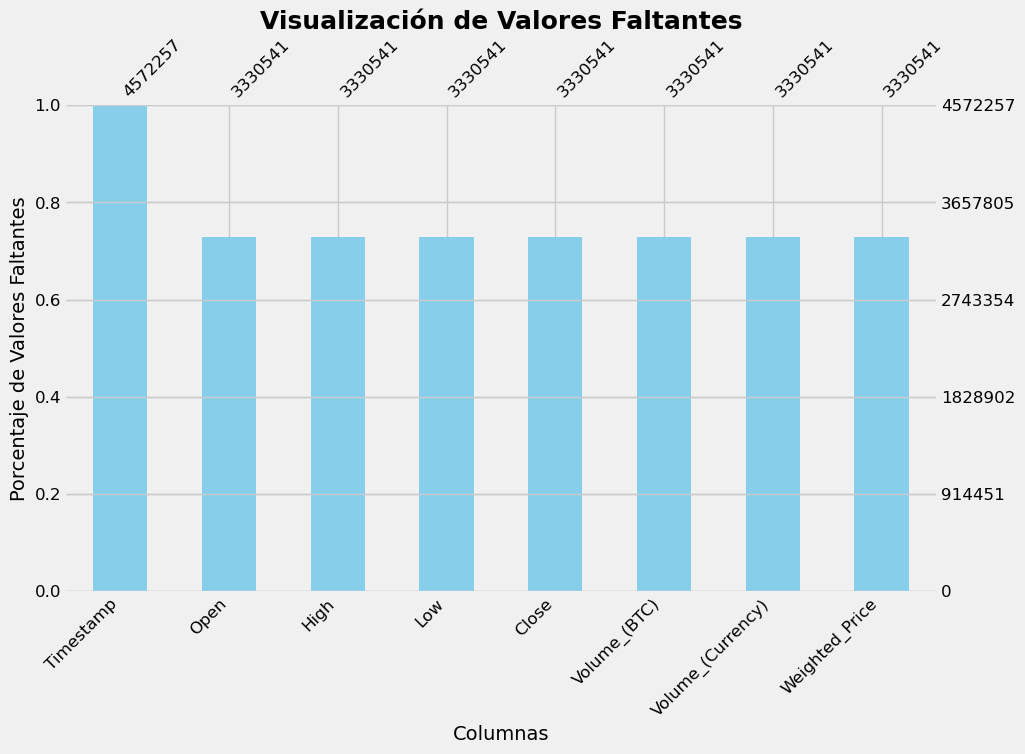

In [77]:
# Crear una figura y ejes con un tamaño personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# Utilizar Missingno para visualizar los datos faltantes en el DataFrame df
msno.bar(df, ax=ax, color='skyblue', fontsize=12)

# Añadir título al gráfico
ax.set_title("Visualización de Valores Faltantes", fontsize=18, weight="bold")

# Añadir etiquetas a los ejes
ax.set_xlabel("Columnas", fontsize=14)
ax.set_ylabel("Porcentaje de Valores Faltantes", fontsize=14)

# Añadir una línea horizontal en el 5% para resaltar áreas críticas
ax.axhline(y=5, color='red', linestyle='--', linewidth=1.5)

# Mostrar la trama
plt.show()

In [78]:
# Calcular el número total de valores faltantes y el porcentaje de valores faltantes para cada columna
nan_values = df.isnull().sum()
nan_por = (nan_values / len(df)) * 100

# Crear una tabla de resumen de valores faltantes
nan_table = pd.DataFrame({'Total de Valores Faltantes': nan_values, 'Faltantes %': nan_por})

# Renombrar las columnas para una mejor claridad
nan_table.rename(columns={'Total de Valores Faltantes': 'Total de Valores Faltantes', 'Faltantes %': 'Porcentaje de Faltantes'}, inplace=True)

# Mostrar la tabla de valores faltantes
nan_table

,Total de Valores Faltantes,Porcentaje de Faltantes
Timestamp,0,0.000000
Open,1241716,27.157616
High,1241716,27.157616
Low,1241716,27.157616
Close,1241716,27.157616
Volume_(BTC),1241716,27.157616
Volume_(Currency),1241716,27.157616
Weighted_Price,1241716,27.157616


Usaremos la interpolación lineal, donde se asume una relación lineal entre los puntos de datos y utiliza valores no faltantes de puntos de datos adyacentes para calcular un valor para un punto de datos faltante.

In [79]:
def fill_missing(df):
    # Lista de columnas numéricas para las cuales se va a aplicar la interpolación
    numeric_columns = ['Open', 'Close', 'Weighted_Price', 'Volume_(BTC)', 'Volume_(Currency)', 'High', 'Low']

    # Aplicar interpolación lineal a las columnas numéricas
    df[numeric_columns] = df[numeric_columns].interpolate()

    # Imprimir la suma de valores faltantes después de la interpolación
    print(df.isnull().sum())

In [80]:
fill_missing(df)

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


#### Time Resampling

Para poder detectar tendencias como buscamos haremos un remuestro temporal.

In [81]:
def resample_data(df):
    # Convertir 'Timestamp' a datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Establecer 'Timestamp' como el índice
    df.set_index('Timestamp', inplace=True)

    # Remuestrear los datos a frecuencia horaria y calcular la media
    df_por_hora = df.resample('1H').mean()

    # Restablecer el índice para convertir 'Timestamp' en una columna regular
    df_por_hora = df_por_hora.reset_index()

    return df_por_hora

In [82]:
# Llamar a la función resample_data para remuestrear los datos por hora
df_hourly = resample_data(df)

df_hourly.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 01:00:00,4.39,4.39,4.39,4.39,0.803709,3.528285,4.39
1,2011-12-31 02:00:00,4.39,4.39,4.39,4.39,4.185530,18.374477,4.39
2,2011-12-31 03:00:00,4.39,4.39,4.39,4.39,10.153449,44.573640,4.39
3,2011-12-31 04:00:00,4.39,4.39,4.39,4.39,16.121368,70.772803,4.39
4,2011-12-31 05:00:00,4.39,4.39,4.39,4.39,22.089286,96.971967,4.39


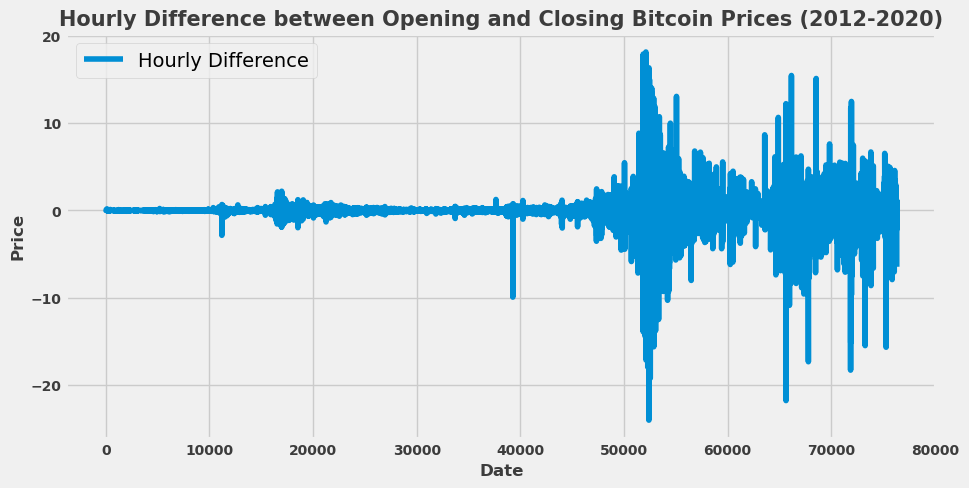

In [83]:
# Data
copia_df = df_hourly.copy()
copia_df["hourly_diff"] = copia_df["Close"] - copia_df["Open"]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(copia_df.index, copia_df["hourly_diff"], label="Hourly Difference")
plt.xticks(fontsize=10, weight="bold", alpha=0.75)
plt.yticks(fontsize=10, weight="bold", alpha=0.75)
plt.xlabel("Date", fontsize=12, weight="bold", alpha=0.75)
plt.ylabel("Price", fontsize=12, weight="bold", alpha=0.75)
plt.title("Hourly Difference between Opening and Closing Bitcoin Prices (2012-2020)", fontsize=15, weight="bold", alpha=0.75)

plt.legend()
plt.show()

In [84]:
def resample_data_dayly(df):
    # Convertir 'Timestamp' a datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Establecer 'Timestamp' como el índice
    df.set_index('Timestamp', inplace=True)

    # Remuestrear los datos a frecuencia horaria y calcular la media
    df_por_hora = df.resample('24H').mean()

    # Restablecer el índice para convertir 'Timestamp' en una columna regular
    df_por_hora = df_por_hora.reset_index()

    return df_por_hora

# Llamar a la función resample_data para remuestrear los datos por dia
df_daily = resample_data_dayly(df_hourly)

df_daily.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.501683,4.503458,4.501683,4.503458,13.319891,59.140401,4.502353
1,2012-01-01,4.869137,4.869137,4.869137,4.869137,9.084847,44.711634,4.869137
2,2012-01-02,5.041873,5.041873,5.041873,5.041873,15.139625,75.799424,5.041873
3,2012-01-03,5.167045,5.167045,5.167045,5.167045,6.015856,31.185542,5.167045
4,2012-01-04,5.388086,5.429860,5.388086,5.429860,14.459669,78.142918,5.403537


### SARIMAX

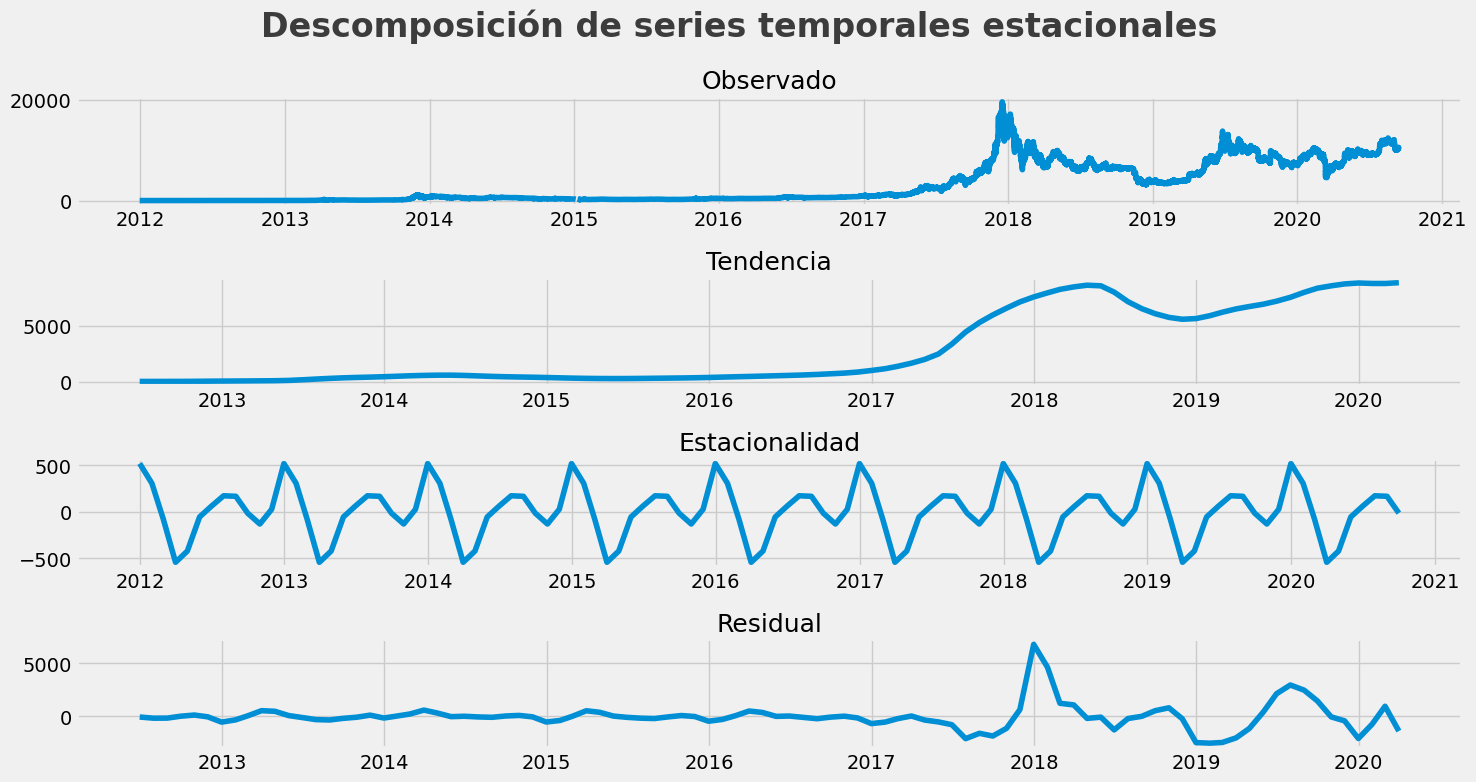

In [22]:
# Seasonal Decompose
plt.figure(figsize=(15, 8))

df_month = df.resample("M").mean()
dec = sm.tsa.seasonal_decompose(df_month["Weighted_Price"])

plt.subplot(411)
plt.plot(df_hourly["Weighted_Price"], label="Precio Ponderado")
plt.title("Observado", fontsize=18)

plt.subplot(412)
plt.plot(dec.trend, label="Tendencia")
plt.title("Tendencia", fontsize=18)

plt.subplot(413)
plt.plot(dec.seasonal, label="Estacionalidad")
plt.title("Estacionalidad", fontsize=18)

plt.subplot(414)
plt.plot(dec.resid, label="Residual")
plt.title("Residual", fontsize=18)

plt.suptitle("Descomposición de series temporales estacionales", fontsize=24, weight="bold", alpha=0.75)
plt.tight_layout()

plt.show()


Podemos ver a partir de las visualizaciones que:

- Los precios de Bitcoin están experimentando una fuerte tendencia hacia arriba.- 
Hay algunos elementos estacionales en el precio (+- 500
- 
La mayor parte del ruido en los datos se generó durantel momento donde el tema estaba en tendencia en 2018-2019.

In [27]:
first_diff = df_month["Weighted_Price"].diff()
print("Dicky-Fuller test de estacionalidad - p: %f" % sm.tsa.adfuller(first_diff[1:])[1])
print("La serie es estacionaria")


df_month["Auto_Diff"] = first_diff

Dicky-Fuller test de estacionalidad - p: 0.000000
La serie es estacionaria


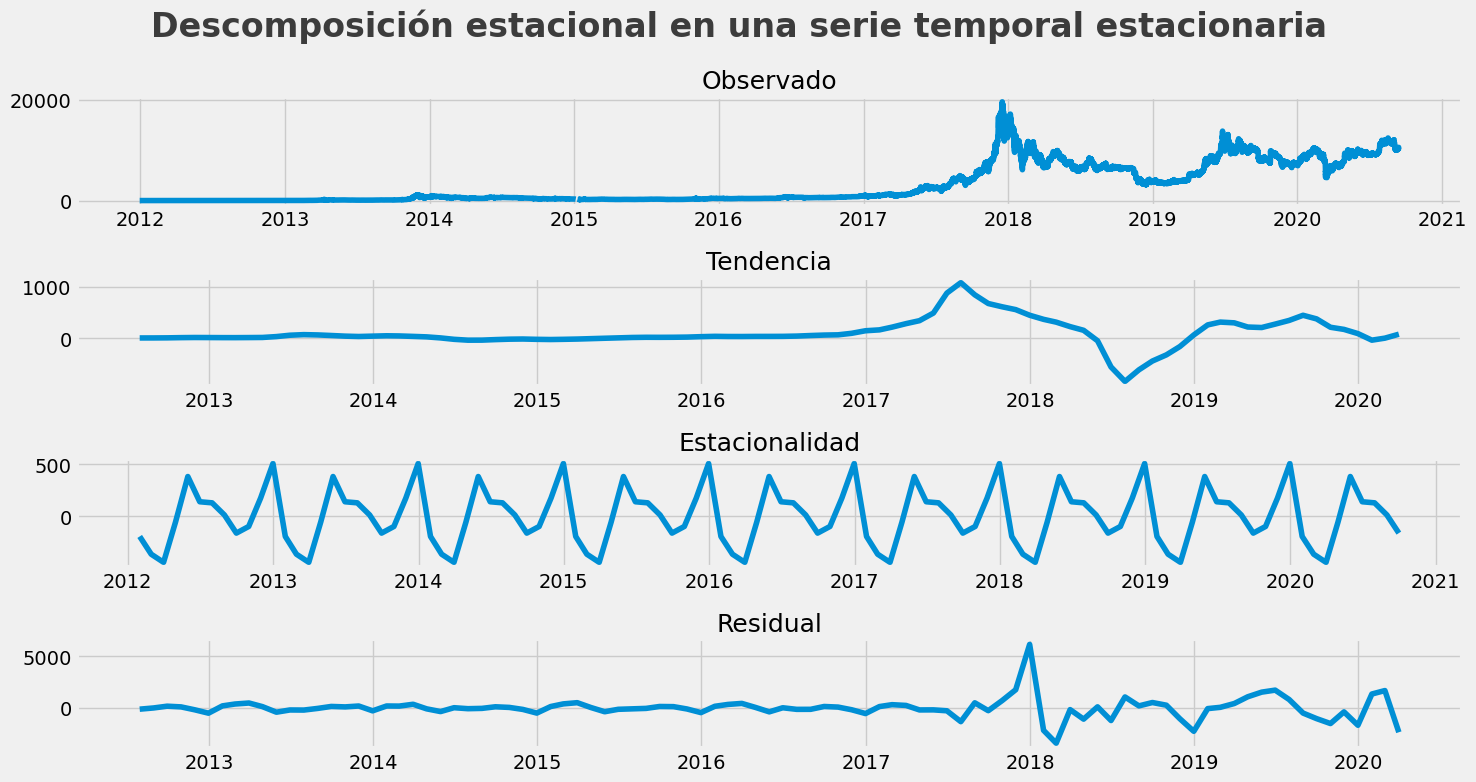

In [29]:
# Descomposición estacional en una serie estacionaria
seasonal_dec = sm.tsa.seasonal_decompose(df_month["Auto_Diff"][1:])

# Gráfico de descomposición estacional en una serie estacionaria
plt.figure(figsize=(15, 8))

plt.subplot(411)
plt.plot(df_hourly["Weighted_Price"], label="Precio Ponderado")
plt.title("Observado", fontsize=18)

plt.subplot(412)
plt.plot(seasonal_dec.trend, label="Tendencia")
plt.title("Tendencia", fontsize=18)

plt.subplot(413)
plt.plot(seasonal_dec.seasonal, label="Estacionalidad")
plt.title("Estacionalidad", fontsize=18)

plt.subplot(414)
plt.plot(seasonal_dec.resid, label="Residual")
plt.title("Residual", fontsize=18)

plt.suptitle("Descomposición estacional en una serie temporal estacionaria", fontsize=24, weight="bold", alpha=0.75)
plt.tight_layout()

plt.show()

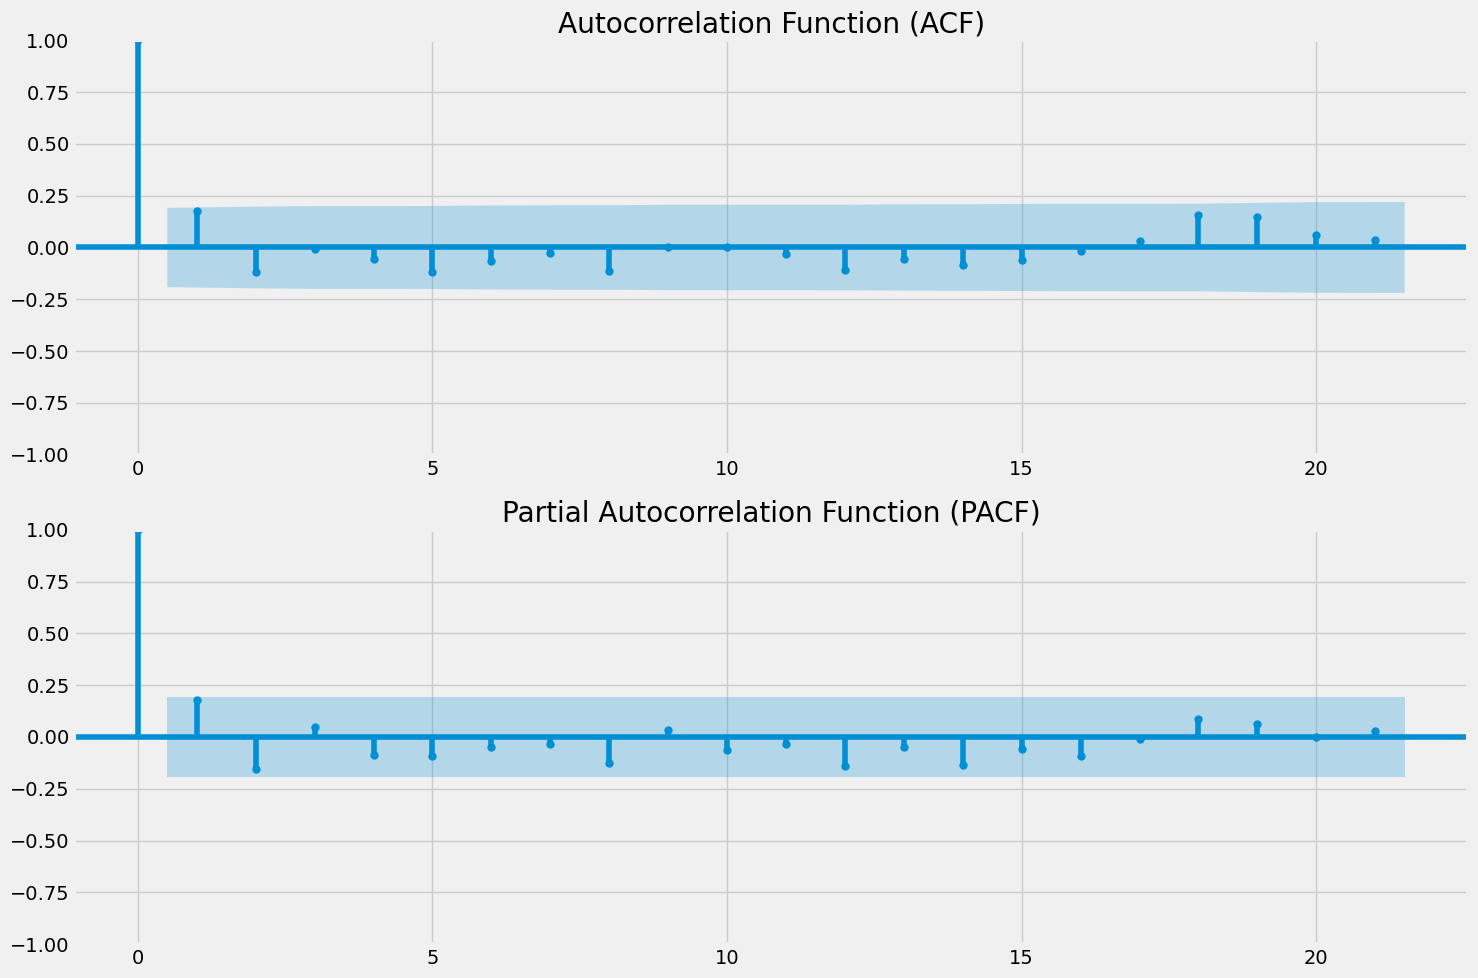

In [31]:
plt.figure(figsize=(15, 10))

plt.subplot(211)
sm.graphics.tsa.plot_acf(first_diff[1:], ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(212)
sm.graphics.tsa.plot_pacf(first_diff[1:], ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()

plt.show()

#### Modelo

In [32]:
#Construir todas las posibles combinaciones de parametros
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [33]:
def sarimax_function(data, pdq, s_pdq):
    """
    Función que utiliza un enfoque de fuerza bruta para aplicar todas las combinaciones posibles de pdq y evaluar el modelo.

    Parámetros:
    - data: Serie temporal para modelar.
    - pdq: Lista de tuplas que contienen los valores (p, d, q) para el modelo ARIMA.
    - s_pdq: Lista de tuplas que contienen los valores (P, D, Q, S) para el componente estacional del modelo SARIMA.

    Retorna:
    - result_list: Lista que contiene todas las combinaciones de parámetros (pdq y s_pdq) y los valores de AIC correspondientes.
    - results: Último modelo ajustado.
    """

    result_list = []  # Lista para almacenar los resultados de cada combinación de parámetros
    for param in pdq:
        for s_param in s_pdq:
            # Crear modelo SARIMAX con los parámetros actuales
            model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=s_param,
                                               enforce_invertibility=False, enforce_stationarity=False)
            # Ajustar el modelo a los datos
            results = model.fit()
            # Almacenar los resultados (parámetros, AIC) en result_list
            result_list.append([param, s_param, results.aic])
            # Imprimir información sobre los parámetros y el AIC para el modelo actual
            print("ARIMA Parameters: {} x: {}. AIC: {}".format(param, s_param, results.aic))

    # Retornar la lista de resultados y el último modelo ajustado
    return result_list, results


In [34]:
result_list,results = sarimax_function(df_month["Weighted_Price"],pdq,seasonal_pdq)

gc.collect()

ARIMA Parameters: (0, 0, 0) x: (0, 0, 0, 12). AIC: 2087.8947732976662
ARIMA Parameters: (0, 0, 0) x: (0, 0, 1, 12). AIC: 1846.3506796210945
ARIMA Parameters: (0, 0, 0) x: (0, 1, 0, 12). AIC: 1785.3490240553533
ARIMA Parameters: (0, 0, 0) x: (0, 1, 1, 12). AIC: 1560.0061518839534
ARIMA Parameters: (0, 0, 0) x: (1, 0, 0, 12). AIC: 1805.0508538375188
ARIMA Parameters: (0, 0, 0) x: (1, 0, 1, 12). AIC: 1756.8852795014104
ARIMA Parameters: (0, 0, 0) x: (1, 1, 0, 12). AIC: 1574.4103524647746
ARIMA Parameters: (0, 0, 0) x: (1, 1, 1, 12). AIC: 1559.6993664501763
ARIMA Parameters: (0, 0, 1) x: (0, 0, 0, 12). AIC: 1992.4796930702646
ARIMA Parameters: (0, 0, 1) x: (0, 0, 1, 12). AIC: 1705.5261924183649
ARIMA Parameters: (0, 0, 1) x: (0, 1, 0, 12). AIC: 1677.3710026953363
ARIMA Parameters: (0, 0, 1) x: (0, 1, 1, 12). AIC: 1461.489104311004
ARIMA Parameters: (0, 0, 1) x: (1, 0, 0, 12). AIC: 1710.8925906542415
ARIMA Parameters: (0, 0, 1) x: (1, 0, 1, 12). AIC: 1658.4523230438997
ARIMA Parameters: (0,

6197

#### Resultados

In [35]:
#Guardamos los resultados y los ordenamos para ver el mejor
results_dataframe = pd.DataFrame(result_list, columns=["dpq","s_dpq","aic"]).sort_values(by="aic")
results_dataframe.head()

,dpq,s_dpq,aic
59,"(1, 1, 1)","(0, 1, 1, 12)",1360.369716
63,"(1, 1, 1)","(1, 1, 1, 12)",1360.512796
27,"(0, 1, 1)","(0, 1, 1, 12)",1360.693666
31,"(0, 1, 1)","(1, 1, 1, 12)",1360.907134
51,"(1, 1, 0)","(0, 1, 1, 12)",1377.854678


In [36]:
model = sm.tsa.statespace.SARIMAX(df_month["Weighted_Price"], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12),
            enforce_invertibility=False,enforce_stationarity=False).fit()
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7620      0.072    -10.522      0.000      -0.904      -0.620
ma.L1          1.0012      2.038      0.491      0.623      -2.994       4.996
ma.S.L12      -1.0169      2.062     -0.493      0.622      -5.059       3.025
sigma2      1.273e+06   6.99e-07   1.82e+12      0.000    1.27e+06    1.27e+06


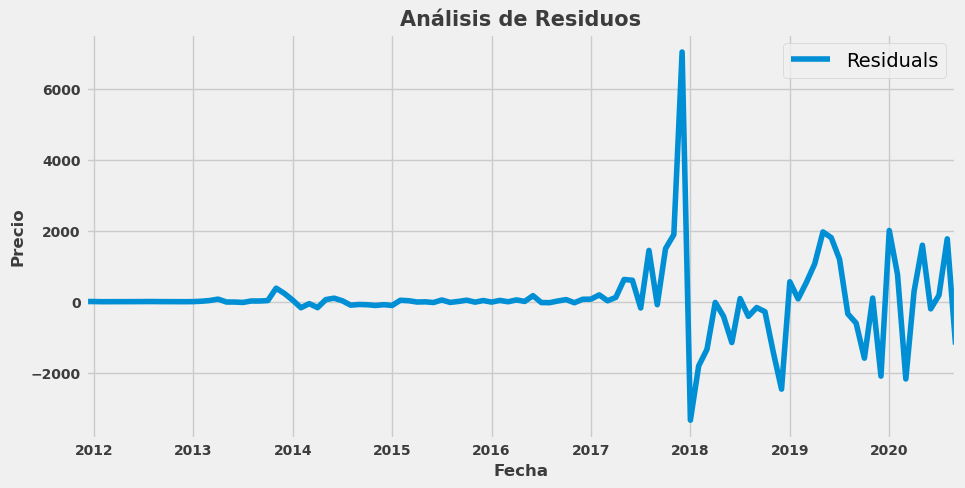

In [42]:
# Análisis de Residuos
plt.figure(figsize=(10, 5))

model.resid.plot(label="Residuals")
plt.xticks(fontsize=10, weight="bold", alpha=0.75)
plt.yticks(fontsize=10, weight="bold", alpha=0.75)

plt.xlabel("Fecha", fontsize=12, weight="bold", alpha=0.75)
plt.ylabel("Precio", fontsize=12, weight="bold", alpha=0.75)
plt.legend()
plt.title("Análisis de Residuos", fontsize=15, weight="bold", alpha=0.75)


plt.show()

<Figure size 1800x1200 with 0 Axes>

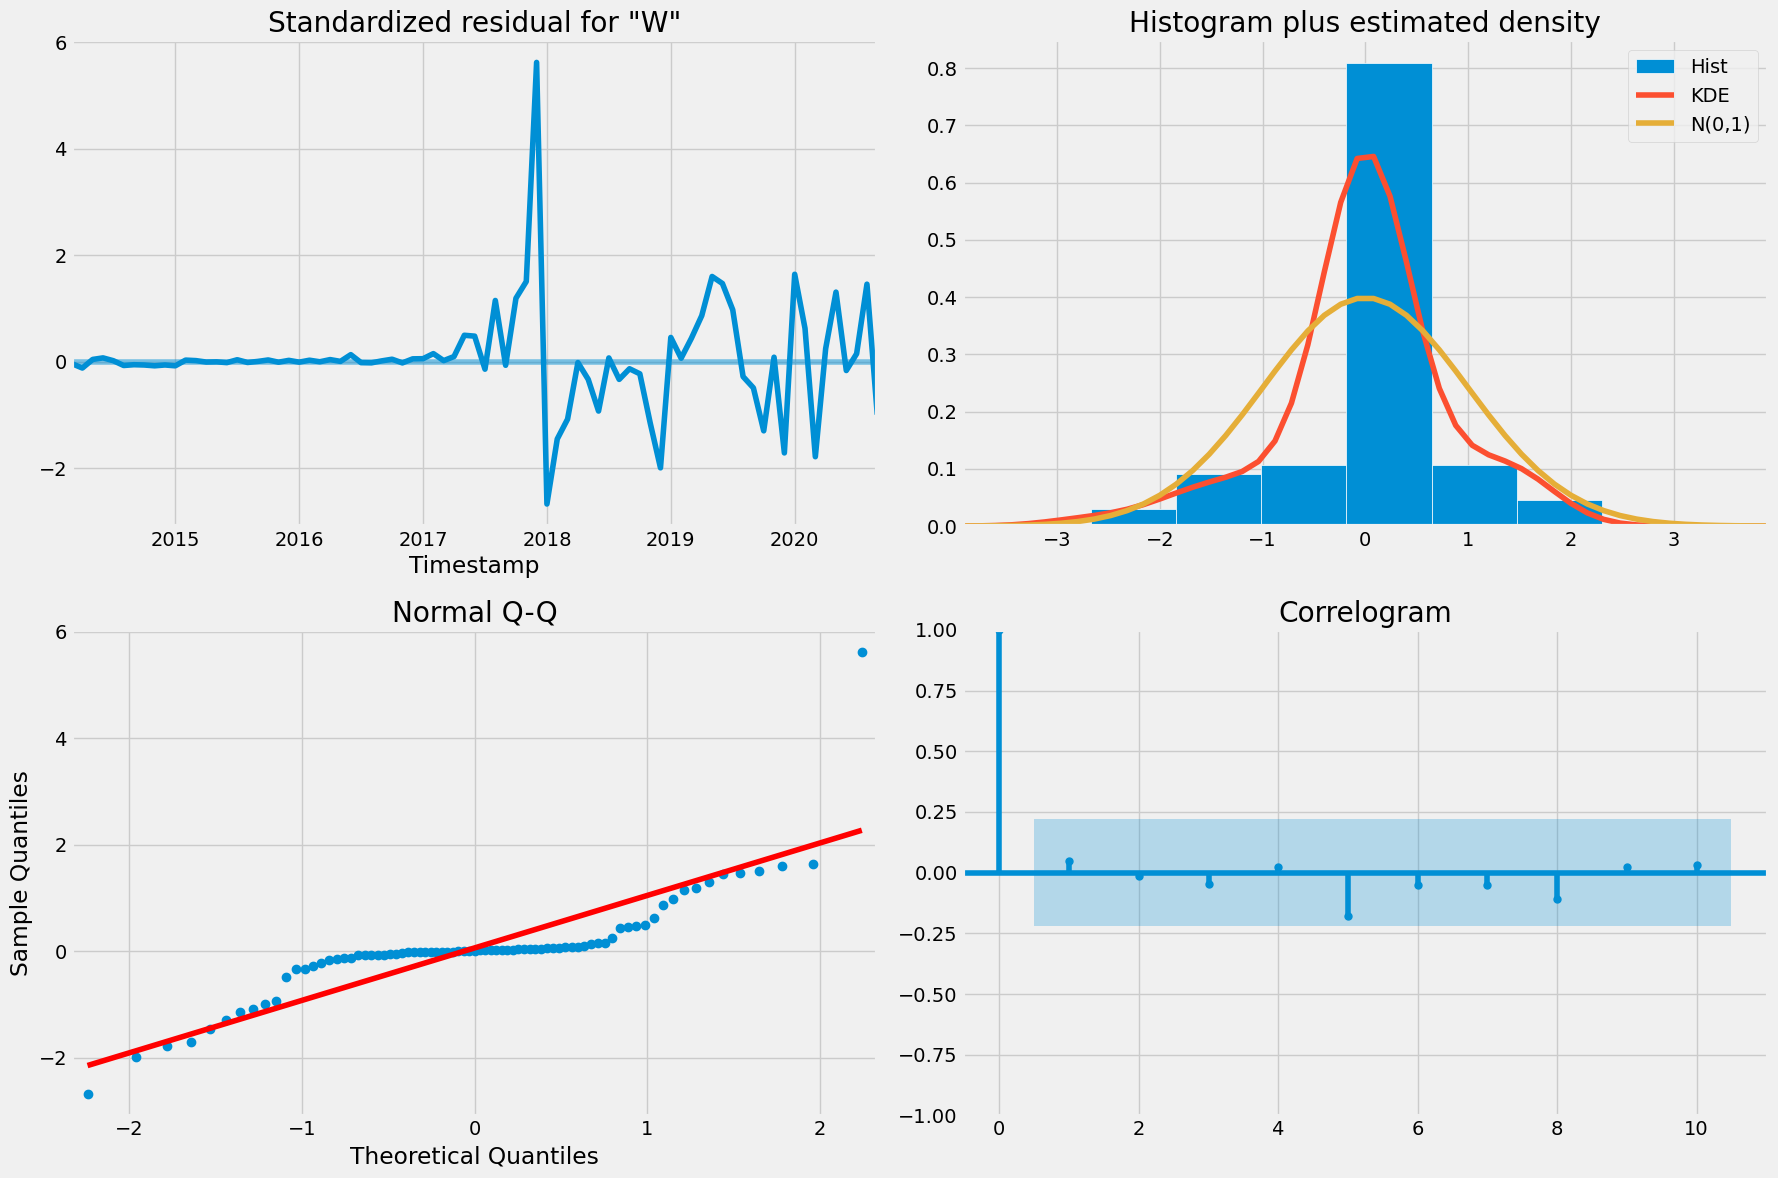

In [45]:
# Plot de los diagnósticos del modelo
plt.figure(figsize=(18, 12))

# Generando diagnósticos con más espacio entre ellos
model.plot_diagnostics(figsize=(18, 12))

plt.tight_layout()
plt.show()



#### Prediccion

In [46]:
df_month_prediction = df_month[["Weighted_Price"]]

df_month_prediction["Forcasting"] = model.predict(start=pd.to_datetime("2011-12-31"), end=pd.to_datetime("2020-04-30"))

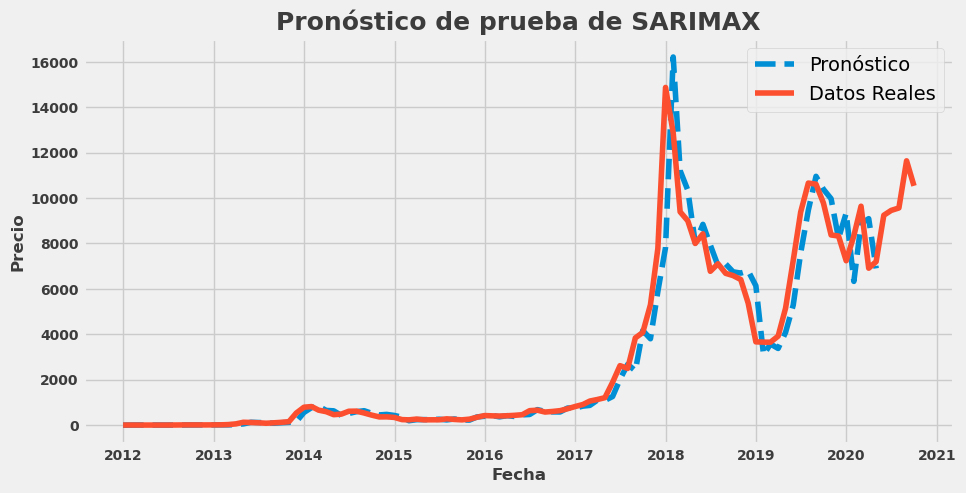

In [48]:
# Gráfico de pronóstico vs. datos reales
plt.figure(figsize=(10, 5))

plt.plot(df_month_prediction["Forcasting"], ls="--", label="Pronóstico")
plt.plot(df_month_prediction["Weighted_Price"], label="Datos Reales")

plt.xticks(fontsize=10, weight="bold", alpha=0.75)
plt.yticks(fontsize=10, weight="bold", alpha=0.75)

plt.xlabel("Fecha", fontsize=12, weight="bold", alpha=0.75)
plt.ylabel("Precio", fontsize=12, weight="bold", alpha=0.75)

plt.legend()

plt.title("Pronóstico de prueba de SARIMAX", fontsize=18, weight="bold", alpha=0.75)

plt.show()


In [49]:
#Datetimeindex dates  to predict
future_dates = [df_month_prediction.index[-1] + DateOffset(months = x)for x in range(1,12)]
future_dates = pd.to_datetime(future_dates)  +  MonthEnd(0)
future = pd.DataFrame(index=future_dates)
df_month_prediction = pd.concat([df_month_prediction,future])

gc.collect()

43779

In [50]:
#Prediction

df_month_prediction["Future_forcast"] = model.predict(start=pd.to_datetime("2020-03-31"),end=pd.to_datetime("2021-03-31"))

pred = model.get_prediction(start=pd.to_datetime("2020-03-31"),end=pd.to_datetime("2021-03-31"))
pred_ci = pred.conf_int()

gc.collect()

26

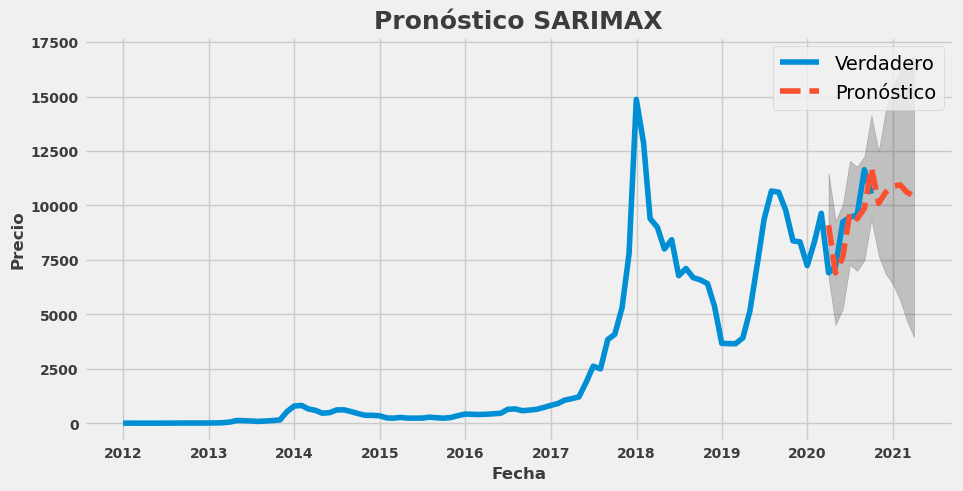

In [56]:
# Gráfico de Pronóstico vs. Datos reales
plt.figure(figsize=(10, 5))

plt.plot(df_month_prediction["Weighted_Price"], label="Verdadero")
plt.plot(df_month_prediction["Future_forcast"], ls="--", label="Pronóstico")

# Ajustando las dimensiones del intervalo de confianza para que coincidan con el índice de df_month_prediction
index = df_month_prediction.index
pred_ci_adjusted = pred_ci.reindex(index)

plt.fill_between(index, pred_ci_adjusted.iloc[:, 0], pred_ci_adjusted.iloc[:, 1], color='k', alpha=.2)

plt.xticks(fontsize=10, weight="bold", alpha=0.75)
plt.yticks(fontsize=10, weight="bold", alpha=0.75)

plt.xlabel("Fecha", fontsize=12, weight="bold", alpha=0.75)
plt.ylabel("Precio", fontsize=12, weight="bold", alpha=0.75)

plt.legend()

plt.title("Pronóstico SARIMAX", fontsize=18, weight="bold", alpha=0.75)

plt.show()


### LSTM

In [85]:
fill_missing(df_daily)

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


Los datos de series temporales pueden ser ruidosos debido a las altas fluctuaciones en el mercado. Como resultado, se vuelve difícil evaluar una tendencia o un patrón en los datos.

Como estamos observando datos diarios, hay bastante ruido presente. Sería útil si pudiéramos promediar esto semanalmente, que es donde entra en juego una media móvil.

Una media móvil, o promedio móvil, es un método de transformación que ayuda a promediar el ruido de los datos. Funciona simplemente dividiendo y agregando los datos en ventanas según la función, como media(), mediana(), count(), etc. Para este ejemplo, usaremos una media móvil para 3, 7 y 30 d






In [86]:
df = df_daily.set_index("Timestamp")

In [87]:
df.reset_index(drop=False, inplace=True)

lag_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Timestamp", drop=False, inplace=True)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.501683,4.503458,4.501683,4.503458,13.319891,59.140401,4.502353,3068.529739,3062.070470,...,3022.153161,70.929922,118.268367,268.753555,9.801208,9.805320,9.811962,3.470434,4.232315,5.234190
2012-01-01,2012-01-01,4.869137,4.869137,4.869137,4.869137,9.084847,44.711634,4.869137,4.501683,4.501683,...,4.503458,70.929922,118.268367,268.753555,13.319891,13.319891,13.319891,3.470434,4.232315,5.234190
2012-01-02,2012-01-02,5.041873,5.041873,5.041873,5.041873,15.139625,75.799424,5.041873,4.685410,4.685410,...,4.686298,0.258574,0.258574,0.258574,11.202369,11.202369,11.202369,2.994628,2.994628,2.994628
2012-01-03,2012-01-03,5.167045,5.167045,5.167045,5.167045,6.015856,31.185542,5.167045,4.804231,4.804231,...,4.804823,0.274909,0.274909,0.274909,12.514788,12.514788,12.514788,3.106643,3.106643,3.106643
2012-01-04,2012-01-04,5.388086,5.429860,5.388086,5.429860,14.459669,78.142918,5.403537,5.026018,4.894934,...,4.895378,0.149585,0.288417,0.288417,10.080109,10.890055,10.890055,4.642597,4.122279,4.122279


Nuestros datos ahora pueden reflejar mejor las tendencias

In [89]:
df["month"] = df.Timestamp.dt.month
df["week"] = df.Timestamp.dt.isocalendar().week
df["day"] = df.Timestamp.dt.day
df["day_of_week"] = df.Timestamp.dt.dayofweek
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,week,day,day_of_week
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.501683,4.503458,4.501683,4.503458,13.319891,59.140401,4.502353,3068.529739,3062.070470,...,9.801208,9.805320,9.811962,3.470434,4.232315,5.234190,12,52,31,5
2012-01-01,2012-01-01,4.869137,4.869137,4.869137,4.869137,9.084847,44.711634,4.869137,4.501683,4.501683,...,13.319891,13.319891,13.319891,3.470434,4.232315,5.234190,1,52,1,6
2012-01-02,2012-01-02,5.041873,5.041873,5.041873,5.041873,15.139625,75.799424,5.041873,4.685410,4.685410,...,11.202369,11.202369,11.202369,2.994628,2.994628,2.994628,1,1,2,0
2012-01-03,2012-01-03,5.167045,5.167045,5.167045,5.167045,6.015856,31.185542,5.167045,4.804231,4.804231,...,12.514788,12.514788,12.514788,3.106643,3.106643,3.106643,1,1,3,1
2012-01-04,2012-01-04,5.388086,5.429860,5.388086,5.429860,14.459669,78.142918,5.403537,5.026018,4.894934,...,10.080109,10.890055,10.890055,4.642597,4.122279,4.122279,1,1,4,2


#### Modelo

Entrenaremos nuestro modelo en el período de entrenamiento, lo evaluaremos en el período de prueba. Aquí, optaremos por una validación basada en hold-out.

El hold-out se utiliza muy frecuentemente con datos de series temporales. En este caso, seleccionaremos todos los datos para 2020 como un hold-out y entrenaremos nuestro modelo en todos los datos de 2012 a 2019.

In [94]:
df_train = df[df.Timestamp < "2020"]
df_test = df[df.Timestamp >= "2020"]

print('Tamaño de train:', df_train.shape)
print('Tamaño de test:', df_test.shape)

Tamaño de train: (2923, 42)
Tamaño de test: (257, 42)


In [95]:
price_series = df_daily.reset_index().Weighted_Price.values
price_series

array([4.50235266e+00, 4.86913732e+00, 5.04187271e+00, ...,
       1.03215607e+04, 1.04022244e+04, 1.03671415e+04])

In [96]:
price_series.shape

(3180,)

In [97]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

In [98]:
train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]
train_data.shape, test_data.shape

((2923, 1), (257, 1))

In [99]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+ time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [100]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [101]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2822, 100), (2822,), (156, 100), (156,))

In [102]:
#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print(X_train.shape) 
print(X_test.shape)

(2822, 100, 1)
(156, 100, 1)


In [104]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [105]:
history = regressor.fit(X_train, y_train, validation_split=0.1, epochs = 50, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - loss: 0.0016 - val_loss: 0.0634
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0109 - val_loss: 0.0398
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0095 - val_loss: 0.0062
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - loss: 0.0187 - val_loss: 0.0031
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0060 - val_loss: 0.0078
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0038 - val_loss: 0.0060
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0051 - val_loss: 0.0024
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 157ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - loss: 0.0028 - val_loss: 0.0050
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 175ms/step

#### Resultados

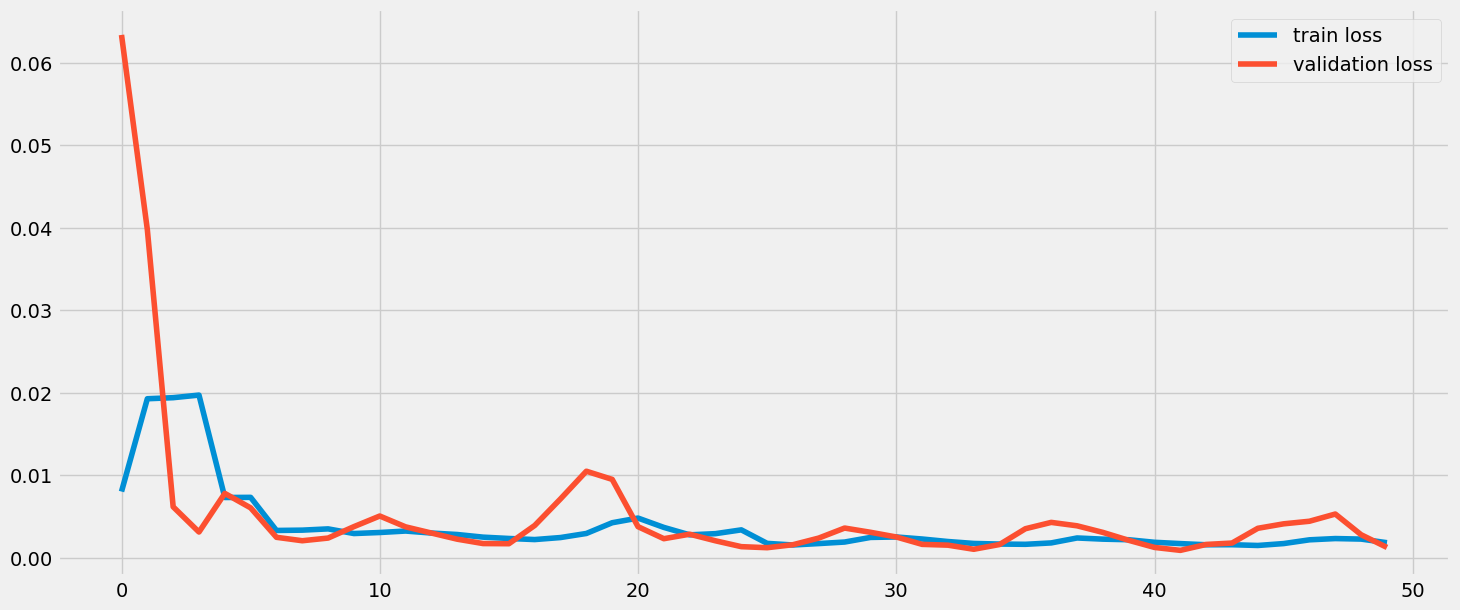

In [106]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()

In [107]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [108]:
# Transformar a forma original

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

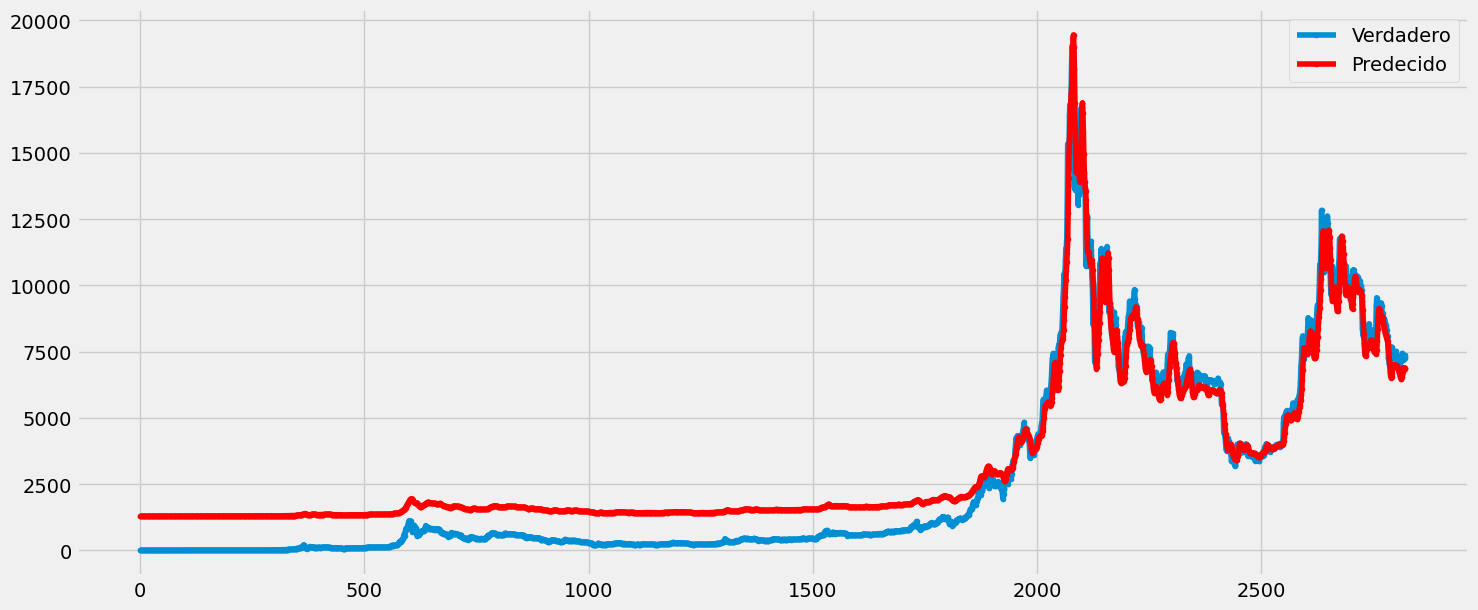

In [110]:
plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Verdadero")
plt.plot(train_predict_inv.flatten(), 'r', marker='.', label="Predecido")
plt.legend()

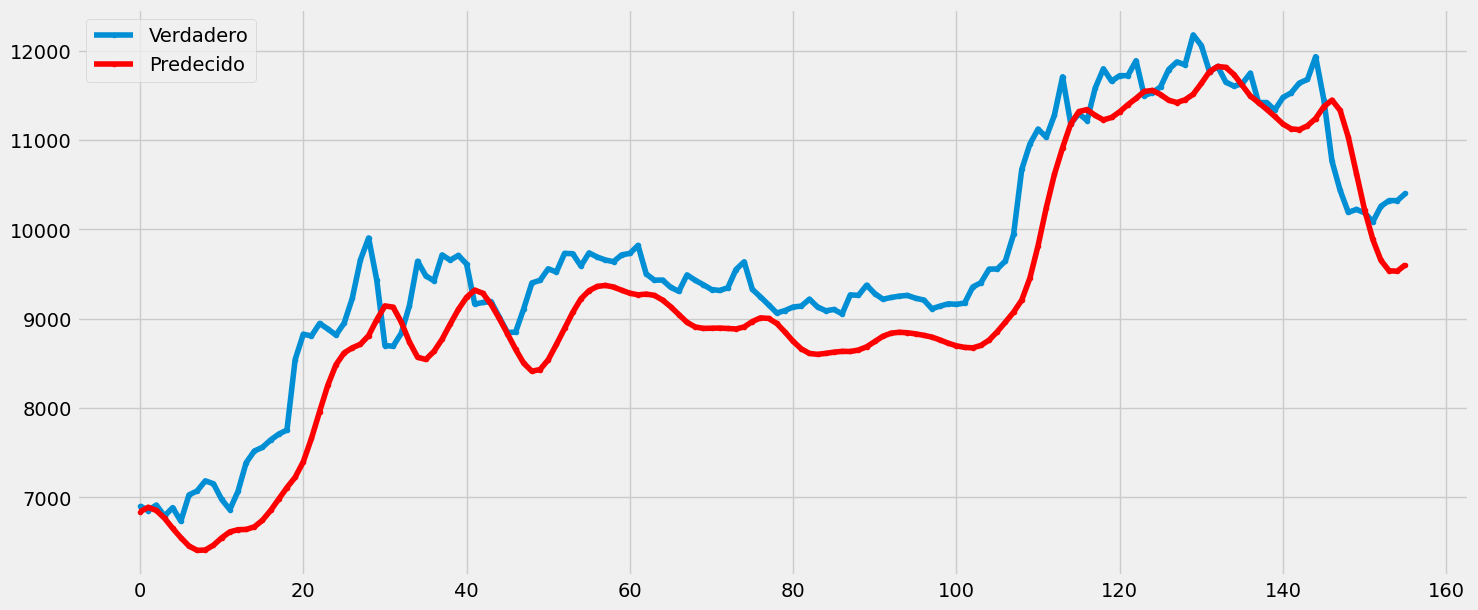

In [111]:
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Verdadero")
plt.plot(test_predict_inv.flatten(), 'r', marker='.', label="Predecido")
plt.legend()

In [112]:
train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 0.05285421825563965
Train MAE: 0.21910604686410975
Test RMSE: 0.03083366334107677
Test MAE: 0.16057621462457375


#### Prediccion

In [114]:
lookback = len(test_data) - 100
x_input=test_data[lookback:].reshape(1,-1)
x_input.shape

(1, 100)

In [115]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [116]:
# Prediccion para 100 dias
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5168791]
101
1 day input [0.50604171 0.51003622 0.51088579 0.5155902  0.4988539  0.49518715
 0.49521298 0.49096655 0.48861823 0.4982709  0.4951108  0.49248268
 0.48967414 0.48910241 0.49073351 0.50142696 0.50595077 0.48978137
 0.4853198  0.48065026 0.47587498 0.47730878 0.47939627 0.47993819
 0.48401792 0.4793465  0.47718679 0.47793612 0.47536032 0.48651142
 0.4862516  0.4922335  0.48725359 0.48396861 0.48498676 0.48578266
 0.48621333 0.48453224 0.48351287 0.47837282 0.47992238 0.48126175
 0.48098096 0.48170331 0.49115152 0.49367742 0.50164758 0.50176576
 0.50645723 0.52213397 0.5602073  0.57518939 0.58393798 0.57920605
 0.59209642 0.61467559 0.58712057 0.59305828 0.58895971 0.60807909
 0.61936884 0.61212539 0.61534691 0.61534722 0.62411741 0.60361293
 0.60539094 0.60874319 0.61896163 0.62341975 0.62170103 0.63928992
 0.63305914 0.61760624 0.62073349 0.61152533 0.6092015  0.61059857
 0.61684867 0.59953852 0.59954413 0.59516791 0.60256242 0.6052283
 0.61097988 0.61313109 0.62649623 0

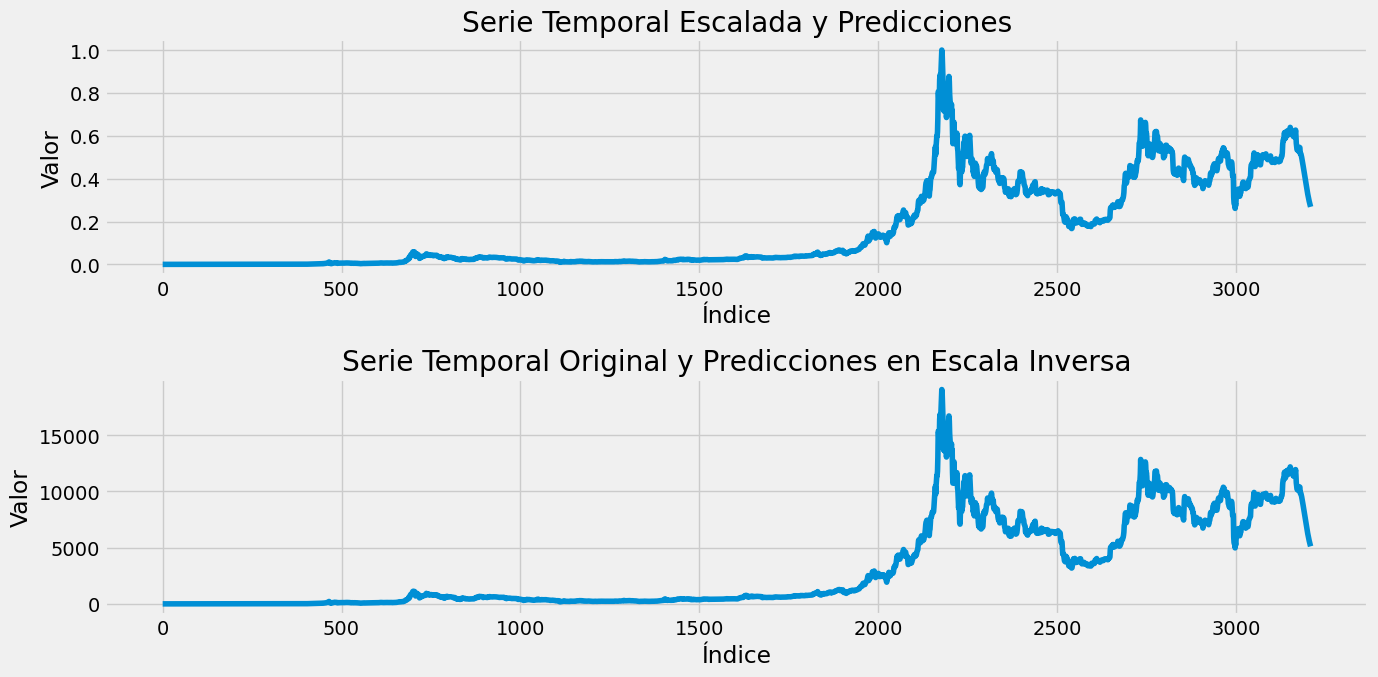

In [118]:
df_pre = price_series_scaled.tolist()
df_pre.extend(lst_output)

plt.figure(figsize=(14, 7))

# Gráfico de la serie temporal escalada y predicciones
plt.subplot(2, 1, 1)
plt.plot(df_pre)
plt.title('Serie Temporal Escalada y Predicciones')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)

# Convertir las predicciones inversas a escala original
df_invscaled = scaler.inverse_transform(df_pre)

# Gráfico de la serie temporal original y predicciones en escala inversa
plt.subplot(2, 1, 2)
plt.plot(df_invscaled)
plt.title('Serie Temporal Original y Predicciones en Escala Inversa')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)

plt.tight_layout()
plt.show()
